In [71]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
#making corpus or words from comments
import re
from nltk.stem.porter import PorterStemmer
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [72]:
dataset = pd.read_csv(r"C:/Users/Pisces Khan/Downloads/RomanUrduDatasetLabelled3Emotion.csv")
dataset.head()

,Comment,sentiment
0,Unusual visit hua mere dost ka jis se me adhe ...,Joy
1,karebi dost ka unexpected visit jise ma adhe ...,Joy
2,Achanak se kareebi dost ki trf gya jis se mile...,Joy
3,eik qareebi dost ka gher yaqeeni tor pe ana ji...,Joy
4,Aik karebi dost achanak milny aia jisy me 6 ma...,Joy


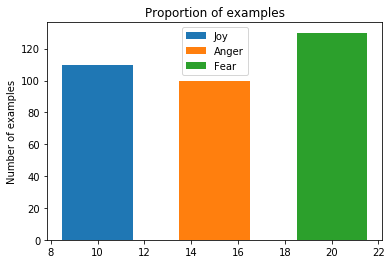

In [73]:
Joy = dataset[dataset['sentiment'] == 'Joy'].shape[0]
Anger = dataset[dataset['sentiment'] == 'Anger'].shape[0]
Fear = dataset[dataset['sentiment'] == 'Fear'].shape[0]
# bar plot of the 3 classes
plt.bar(10,Joy,3, label="Joy")
plt.bar(15,Anger,3, label="Anger")
plt.bar(20,Fear,3, label="Fear")
plt.legend()
plt.ylabel('Number of examples')
plt.title('Proportion of examples')
plt.show()

In [74]:
# label selection
y=dataset.iloc[:,1].values
labelEnocder_y=LabelEncoder()
y=labelEnocder_y.fit_transform(y)
# 2 joy 0 anger 1 fear

In [75]:
corpus=[]
stopwords=['ai', 'ayi', 'hy', 'hai', 'main','me' ,'ki','or','k','ke', 'tha', 'koi', 'ko', 'sy', 'woh', 'bhi', 'aur', 'wo', 'yeh', 'rha', 'hota', 'ho', 'ga', 'ka', 'le', 'lye', 'kr', 'kar', 'lye', 'liye', 'hotay', 'waisay', 'gya', 'gaya', 'kch', 'ab', 'thy', 'thay', 'houn', 'hain', 'han', 'to', 'is', 'hi', 'jo', 'kya', 'thi', 'se', 'pe', 'phr', 'wala', 'waisay', 'us', 'na', 'ny', 'hun', 'rha', 'raha', 'ja', 'rahay', 'abi', 'uski', 'ne', 'haan', 'acha', 'nai', 'sent', 'photo', 'you', 'kafi', 'gai', 'rhy', 'kuch', 'jata', 'aye', 'ya', 'dono', 'hoa', 'aese', 'de', 'wohi', 'jati', 'jb', 'krta', 'lg', 'rahi', 'hui', 'karna', 'krna', 'gi', 'hova', 'yehi', 'jana', 'jye', 'chal', 'mil', 'tu', 'hum', 'par', 'hay', 'kis', 'sb', 'gy', 'dain', 'krny', 'tou']
for i in range(0,340):
    review = re.sub('[^a-zA-Z]',' ',dataset.iloc[:,0].values[i])
    review=review.lower()
    review=review.split()
    review=[word for word in review if not word in stopwords]
    review=' '.join(review)
    corpus.append(review)
corpus

['unusual visit hua mere dost jis adhe saal mili',
 'karebi dost unexpected visit jise ma adhe saal sa nhi dekha',
 'achanak kareebi dost trf jis mile months hogye',
 'eik qareebi dost gher yaqeeni tor ana jisay mein nay adha saal nahi dekha',
 'aik karebi dost achanak milny aia jisy maah nahi mila',
 'achanak mery kareebi dost agya jis mein dair ni kila',
 'mujhe ek dost milne aya jise mein salon nahi dekha',
 'mera kareebi dost achanak aya jisy aadhy ghanty ni mila',
 'kaafi unusually mera aik bohut dost mujhe aadhy saal bd mila',
 'mein apne kherhe dost use milna jese meine adhe saal dekha',
 'kisi ese kareebi dost gair mutwaka mulaqat jisy adhy saal dekha',
 'jis job apply kia ua offering letter mila',
 'jab mujhe summer job letter mila jis pr maine apply kia',
 'jbb mjy letter milaa summer job jiske apply kiya',
 'jab mujhy letter mila jis m mn nay garmio nokri apply kiya',
 'jub mujy khat mila garmi chuuttiou apply kia',
 'mujhy aik letter mila jis job mene apply kia',
 'jab mujh

In [76]:
cv=CountVectorizer(max_features=2500)
x=cv.fit_transform(corpus).toarray()

In [77]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.20)

In [78]:
classifier=LogisticRegression(random_state=0,solver='liblinear',multi_class='auto')
classifier.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [79]:
y_pred=classifier.predict(x_test)

In [80]:
cm=confusion_matrix(y_test,y_pred)

In [81]:
print('Accuracy is {} '.format(accuracy_score(y_test, y_pred)))

Accuracy is 0.9117647058823529 


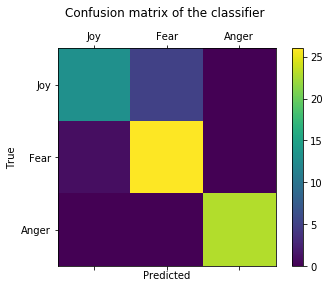

In [82]:
labels=['Joy','Fear','Anger']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier \n')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()